#  K-Nearest Neighbors (KNN) Classification – Iris Dataset

This notebook demonstrates how to perform **KNN classification** using the **Iris dataset**.

###  What We’ll Do:
- Upload and read the dataset
- Normalize the feature values
- Train the KNN model
- Evaluate it using accuracy & confusion matrix
- Visualize decision boundaries (optional)


In [10]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris (1).csv


##  Loading the Dataset

Let’s load the dataset using **pandas** and view the first few rows.


In [13]:
import pandas as pd

df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  Dataset Overview

The dataset contains **features of Iris flowers**:
- Sepal length, Sepal width
- Petal length, Petal width

And the **target**: the species of the flower.


In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


##  Data Preprocessing

We’ll normalize the features using **StandardScaler** and split the data into **train/test sets**.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##  Training the KNN Classifier

We’ll use `KNeighborsClassifier` from **scikit-learn** with `k=3`.


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


##  Model Evaluation

We will use:
- Accuracy Score
- Confusion Matrix


Accuracy: 1.00


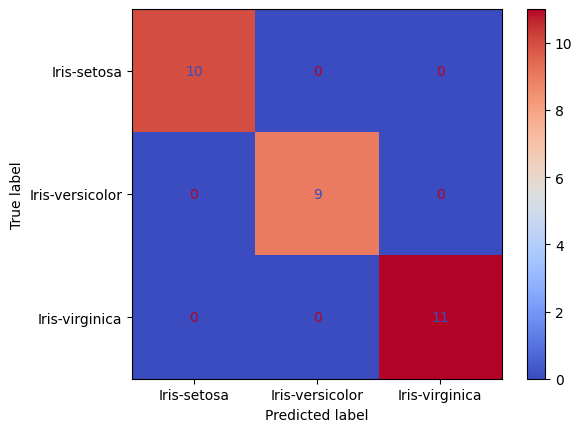

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="coolwarm")


## Visualizing Decision Boundaries (2 Features Only)

Let’s reduce the features to 2 (e.g., Petal Length & Width) for boundary visualization.


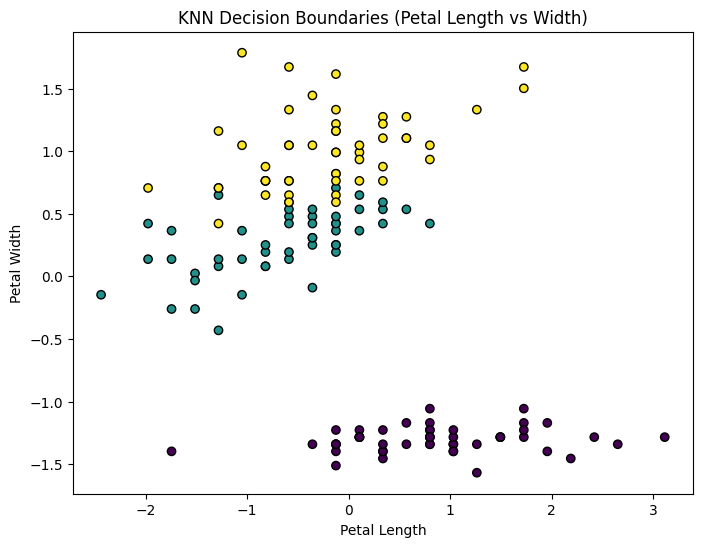

In [19]:
import numpy as np
import matplotlib.pyplot as plt

X_simple = df.iloc[:, [2, 3]].values  # Petal Length & Width
y_simple = df.iloc[:, -1].values


X_scaled = scaler.fit_transform(X_simple)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_simple, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

from matplotlib.colors import ListedColormap

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pd.factorize(y_simple)[0], edgecolors='k')
plt.title("KNN Decision Boundaries (Petal Length vs Width)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
